# Prepare word2vec

In [1]:
import word2vec, sys, os, math
import pickle as pkl
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
word2vec_bin_loc = '/media/mrmad/283d233c-d7d8-4bd6-830b-25f7c7a665f0/mrmad/Documents/Essex/Thesis/vivan/Neuro_Agent_FInal/scholar/untagged_wikipedia_for_word2vec.bin'

In [3]:
def load_word2vec(model_filename):
    model = word2vec.load(model_filename)
    return model

In [4]:
word_vectors = load_word2vec(word2vec_bin_loc)

In [5]:
# check if works
word_vectors['trump']

array([ 0.01308811, -0.07988005,  0.10500788,  0.07100031, -0.07165847,
        0.11938906,  0.0280553 ,  0.14792797,  0.23113307,  0.01723865,
        0.03450589, -0.07995256, -0.05783403,  0.03983924, -0.1888995 ,
       -0.09949619, -0.03393186,  0.11679307,  0.18283083,  0.08827897,
        0.03169184,  0.01546468,  0.1338411 , -0.02819854, -0.01757766,
       -0.04990632,  0.1517567 , -0.11641905, -0.00338179,  0.02553399,
       -0.02359519, -0.12224154, -0.04414155, -0.02390066, -0.08413405,
        0.0203083 ,  0.07319663,  0.08502512,  0.1577934 , -0.12009872,
       -0.01799029, -0.01995073,  0.26017562, -0.12101247,  0.00133403,
        0.03656866, -0.13598526, -0.22576216, -0.04886628,  0.01520873,
        0.03005804, -0.03202747, -0.01397827, -0.09020092, -0.03266959,
        0.19127548, -0.20276776, -0.08222742,  0.05252043,  0.01709458,
        0.00267752,  0.06112841,  0.10025077, -0.00340389,  0.06422501,
       -0.11270928, -0.08901594,  0.14634514,  0.10648733, -0.03

# TRY NEW METHOD . it works
from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne/notebook

# Function to plot the words in TSNE

In [6]:
def tsne_plot(tokens,labels,name):
    "Creates and TSNE model and plots it"  
    #tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_model = TSNE(perplexity=40, n_components=2, n_iter=4000)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    plt.axis([-8,8,-9,8])
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(name, bbox_inches = 'tight')
    plt.show()

# 1) Function to plot the words seen before the game

# The words seen during the games are in:

# Lets use run_1

In [7]:
with open('./finalruns/run_1/words_seen_zork1_pop50gen500_220818.pkl', 'rb') as i:
    x = pkl.load(i)

In [8]:
len(x)

108

In [9]:
before_labels = []
before_tokens = []

for y in x:
    label = x[y]
    before_tokens.append(word_vectors.vectors[label])
    before_labels.append(word_vectors.vocab[label])

In [10]:
arr = [str(r) for r in before_labels]
print(arr)

['krista', 'more', 'the', 'sunglasses', 'conservative', 'numerous', 'n', 'i', 'raw', 'sources', 'show', 'coaches', 'countries.', 'self', 'none', 'wenlock', 'fc', 'x', 'eons', 'should', 'be', 'nine', 'instance', 'lost', 'snake', 'three', 'followup', 'registered', 'below.', 'nuclear', 'adventists', 'graduating', 'versus', 'bibliography', 'doppels', 'public', 'cd', 'article', 'fact.', 'hit', 'election', 'people', 'android', 'an', 'how', 'that', 'politicians', 'allaboutjazz.', 'one', 'debut', 'and', 'archive', 'island', 'august', 'called', 'this', 'arseniy', 'ponies', 'it.', 'images', 'reconfirmation.', 'transwiki', 'mustaches', 'for', 'family.', 'https', 'sampling', 'its', 'escape', 'typo', 'page', 'ma', 'score', 'term', 'advertising', 'tracks', 'metaproscaline', 'language', 'of', 'size', 'status', 'timsah', 'zero', 'lacandon', 'close', 'their', 'to', 'exotic', 'heavy', 'yellow', 'seems', 'hungary', 'choice', 'bible', 'kyogre', 'romano', 'see', 'recapture', 'gorton', 'at', 'm.', 'under', 

In [11]:
len(before_tokens)

108

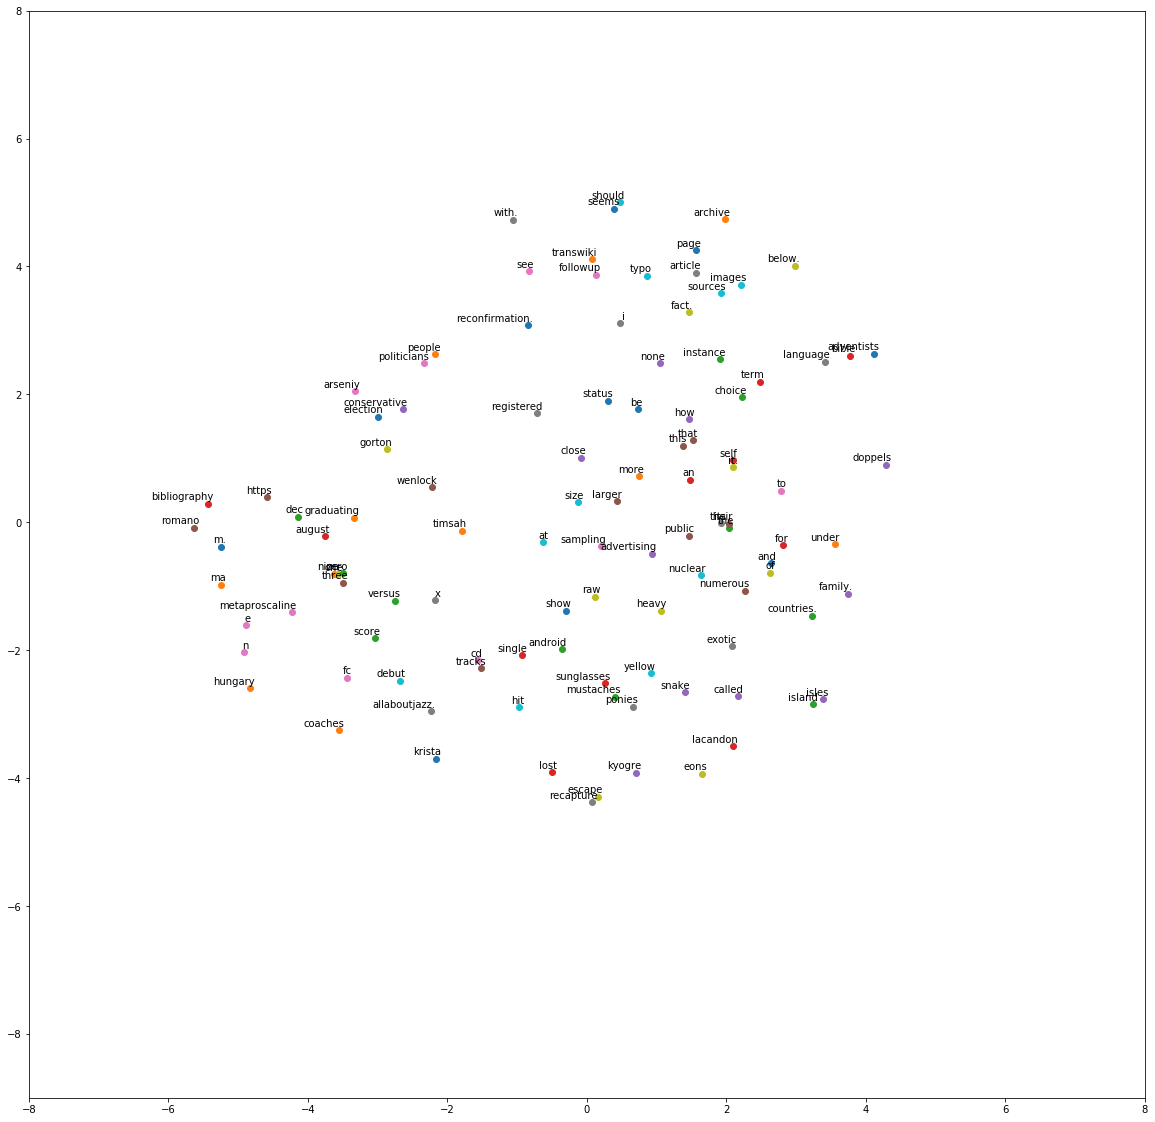

In [12]:
name1 = 'TSNE plot of word embeddings at the start of game.png'
tsne_plot(before_tokens,before_labels,name1)

# 2) The plot of words seen during the games at counter 100:

In [13]:
with open('./finalruns/run_1/saved_pickles/test_word_seen_vectors_at_100_.pkl', 'rb') as f:
    tokens_during_100 = pkl.load(f)

In [14]:
tokens_during_100[:1]

[array([-1.        , -1.        , -1.        , -1.        ,  0.99999619,
         1.        ,  1.        ,  1.        ,  1.        , -1.        ,
        -1.        ,  1.        ,  0.99996847,  1.        , -1.        ,
        -1.        , -0.99999136,  1.        , -1.        ,  1.        ,
         0.78421646, -1.        , -1.        ,  0.99999803, -1.        ,
         1.        , -0.98966426,  1.        , -1.        ,  1.        ,
         0.99999541, -1.        , -1.        ,  0.99730074,  1.        ,
         0.88119334, -0.9999761 , -1.        ,  1.        ,  0.99999994,
         1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        ,  1.        ,  0.9999305 , -0.99986309, -1.        ,
         1.        , -1.        , -1.        ,  1.        ,  0.99999952,
         0.9999907 ,  1.        ,  1.        ,  0.42309615,  1.        ,
        -1.        , -1.        ,  0.98889804,  1. 

In [15]:
with open('./finalruns/run_1/saved_pickles/test_word_seen_vocabs_at_100_.pkl', 'rb') as g:
    labels_during_100 = pkl.load(g)

In [16]:
labels_during_100[:2]

['a_DT', 'contains_NNS']

In [17]:
# remove tag comments
labels_during_100_clean = [] 

for r in labels_during_100:
    labels_during_100_clean.append(r.split('_')[0])

In [18]:
len(labels_during_100_clean)

81

In [19]:
print(labels_during_100_clean)

['a', 'contains', 'south', 'nest', 'among', 'securely', 'fastened', 'chirping', 'heads', 'standing', 'above', 'through', 'sunlight', 'nestled', 'small', 'an', 'appears', 'sides', 'to', 'some', 'the', 'pile', 'door', 'distance', 'leaflet', 'branches', 'nearest', 'large', 'egg', 'trees', 'branch', 'east', 'leads', 'a', 'here', 'tree', 'be', 'south', 'there', 'bird', 'reach', 'leaves', 'into', 'front', 'up', 'white', 'on', 'path', 'west', 'about', 'surrounding', 'ground', 'field', 'are', 'mailbox', 'at', 'particularly', 'west', 'lit', 'grating', 'open', 'hear', 'all', 'low', 'carrying', 'feet', 'clearing', 'this', 'with', 'directions', 'in', 'of', 'forest', 'you', 'winding', 'edge', 'one', 'house', 'stands', 'is', 'song']


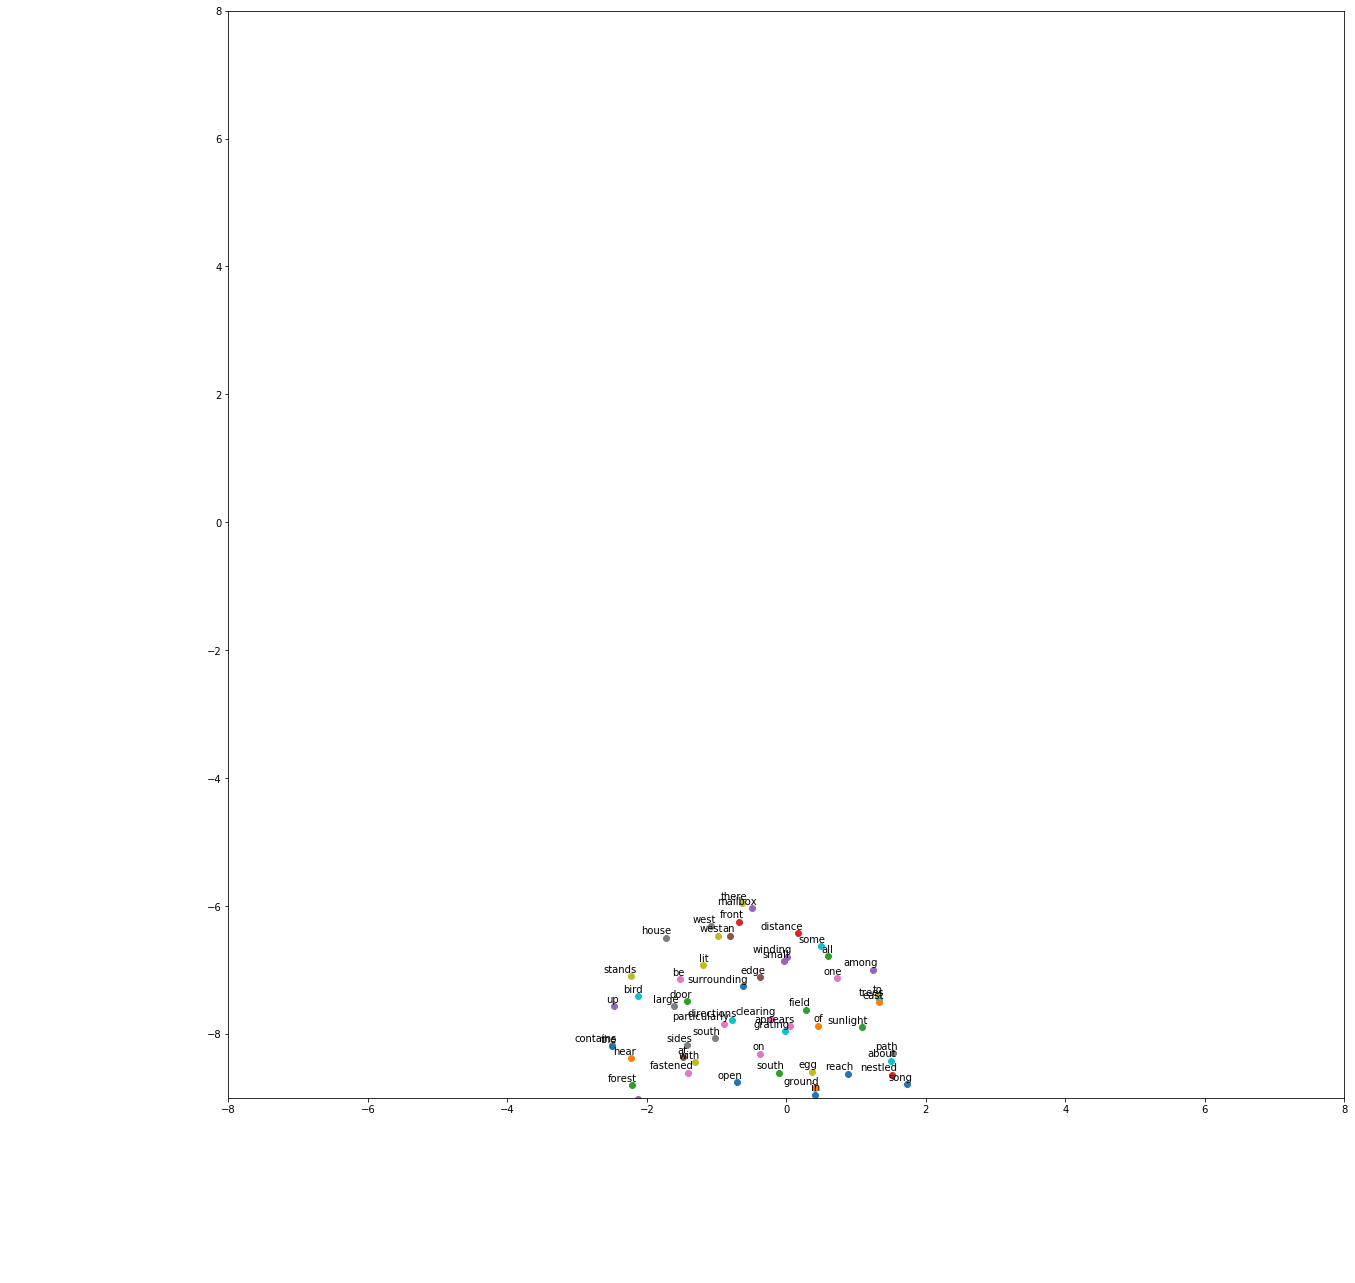

In [20]:
name2 = 'TSNE plot of word embeddings during the game at generation 100.png'
tsne_plot(tokens_during_100,labels_during_100_clean,name2)

# 3) The plot of words seen during the games at counter 400:

In [21]:
with open('./finalruns/run_1/saved_pickles/test_word_seen_vectors_at_400_.pkl', 'rb') as f:
    tokens_during_400 = pkl.load(f)

In [22]:
tokens_during_400[:1]

[array([-1.        , -1.        , -1.        , -1.        ,  1.        ,
         1.        ,  1.        ,  0.99969608, -1.        ,  1.        ,
        -1.        , -1.        ,  1.        , -1.        ,  1.        ,
         0.99998635, -1.        ,  1.        ,  1.        , -1.        ,
         1.        , -1.        ,  1.        ,  1.        ,  0.99999851,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        ,  1.        , -1.        , -1.        ,  0.9995783 ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        , -1.        ,  1.        ,  0.4982768 ,  1.        ,
        -1.        ,  1.        ,  0.98910016,  1.        ,  1.        ,
         1.        , -1.        , -0.99999952,  1.        , -1.        ,
        -1.        , -0.9880892 ,  1.        , -1.        ,  0.99939615,
        -1.        , -1.        ,  0.99999976,  0.40933692, -1.        ,
        -1.        , -1.        , -1.        , -1. 

In [23]:
with open('./finalruns/run_1/saved_pickles/test_word_seen_vocabs_at_400_.pkl', 'rb') as g:
    labels_during_400 = pkl.load(g)

In [24]:
labels_during_400[:1]

['contains_NNS']

In [25]:
# remove tag comments
labels_during_400_clean = [] 

for r in labels_during_400:
    labels_during_400_clean.append(r.split('_')[0])

In [26]:
print(labels_during_400_clean)

['contains', 'that', 'the', 'leaflet', 'edge', 'branch', 'through', 'be', 'moves', 'white', 'south', 'path', 'west', 'ground', 'forest', 'grating', 'particularly', 'west', 'lit', 'some', 'this', 'in', 'leads', 'points', 'is', 'fastened', 'standing', 'total', 'above', 'egg', 'branches', 'trees', 'a', 'here', 'tree', 'there', 'reach', 'front', 'already', 'into', 'broken', 'are', 'large', 'score', 'directions', 'chirping', 'of', 'below', 'a', 'rank', 'south', 'get', 'small', 'an', 'and', 'see', 'up', 'encrusted', 'heads', 'nestled', 'on', 'surrounding', 'field', 'hear', 'all', 'carrying', 'clearing', 'can', 'door', 'you', 'low', 'want', 'nest', 'appears', 'securely', 'sides', 'with', 'sunlight', 'one', 'song', 'among', 'have', 'to', 'pile', 'distance', 'put', 'east', 'stands', 'bird', 'leaves', 'broken', 'winding', 'about', 'clockwork', 'mailbox', 'at', 'open', 'what', 'feet', 'do', 'gives', 'house', 'nearest']


In [27]:
len(labels_during_400_clean)

103

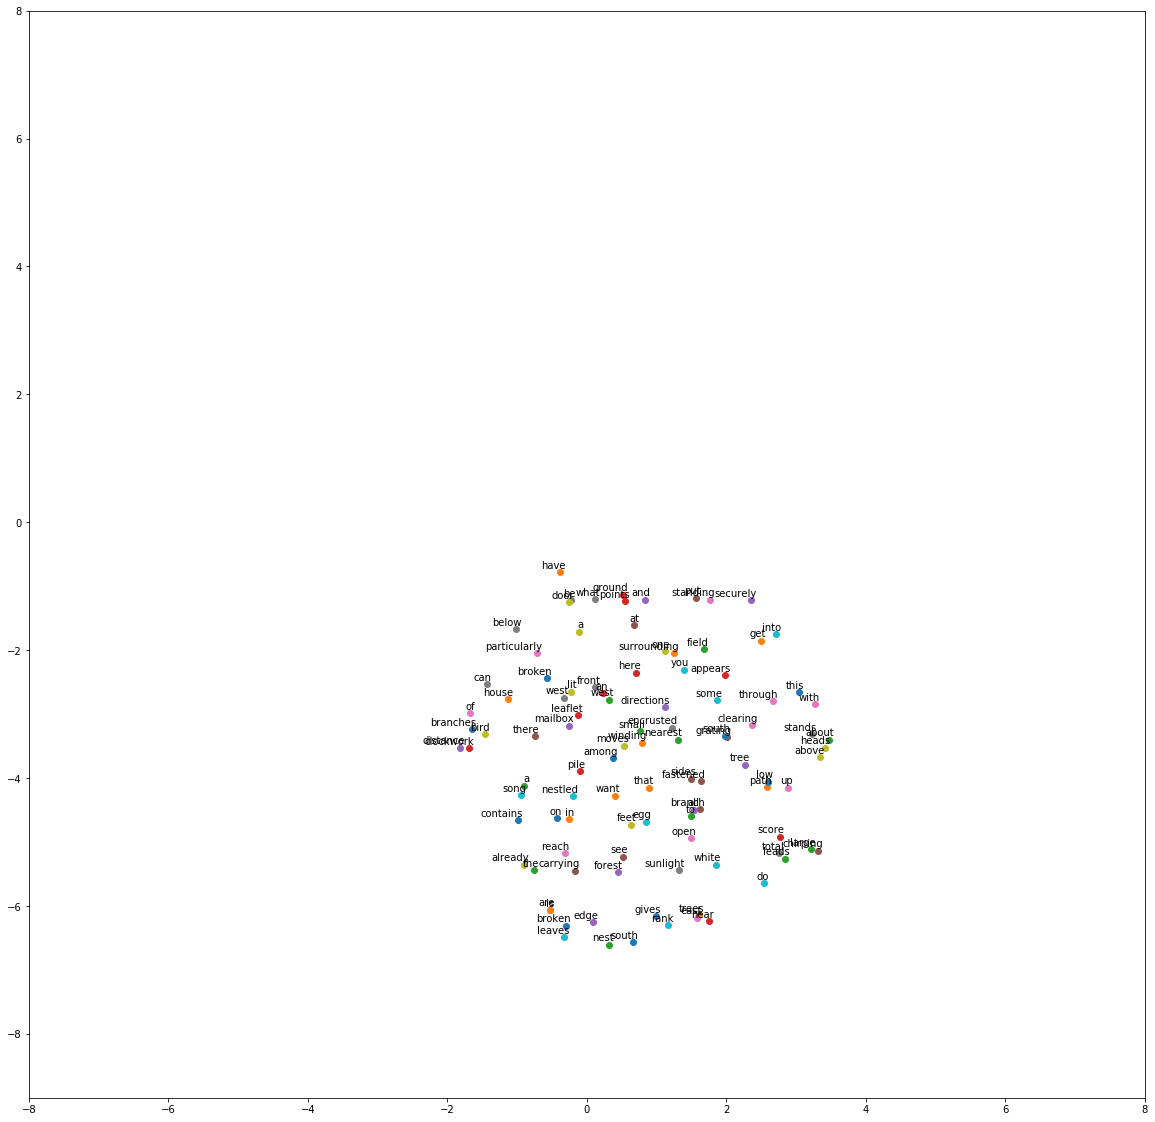

In [28]:
name3 = 'TSNE plot of word embeddings during the game at generation 400.png'
tsne_plot(tokens_during_400,labels_during_400_clean,name3)

# 4) The plot of words seen at end of the games are:

In [29]:
with open('./finalruns/run_1/test_word_seen_vectors_zork1_pop50gen500_220818.pkl', 'rb') as f:
    tokens_after = pkl.load(f)

In [30]:
len(tokens_after)

108

In [31]:
tokens_after[:1]

[array([-1.        , -1.        , -1.        , -1.        ,  1.        ,
         1.        ,  1.        ,  0.99969608, -1.        ,  1.        ,
        -1.        , -1.        ,  1.        , -1.        ,  1.        ,
         0.99998635, -1.        ,  1.        ,  1.        , -1.        ,
         1.        , -1.        ,  1.        ,  1.        ,  0.99999851,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        ,  1.        , -1.        , -1.        ,  0.9995783 ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        , -1.        ,  1.        ,  0.4982768 ,  1.        ,
        -1.        ,  1.        ,  0.98910016,  1.        ,  1.        ,
         1.        , -1.        , -0.99999952,  1.        , -1.        ,
        -1.        , -0.9880892 ,  1.        , -1.        ,  0.99939615,
        -1.        , -1.        ,  0.99999976,  0.40933692, -1.        ,
        -1.        , -1.        , -1.        , -1. 

In [32]:
with open('./finalruns/run_1/test_word_seen_vocab_zork1_pop50gen500_220818.pkl', 'rb') as g:
    labels_after = pkl.load(g)

In [33]:
len(labels_after)

108

In [34]:
labels_after[:1]

['contains_NNS']

In [35]:
# remove tag comments
labels_after_clean = [] 

for r in labels_after:
    labels_after_clean.append(r.split('_')[0])

In [36]:
print(labels_after_clean)

['contains', 'that', 'the', 'leaflet', 'edge', 'branch', 'through', 'be', 'moves', 'white', 'south', 'path', 'west', 'ground', 'forest', 'grating', 'particularly', 'west', 'lit', 'some', 'this', 'in', 'leads', 'points', 'is', 'fastened', 'standing', 'total', 'above', 'impassable', 'egg', 'branches', 'trees', 'a', 'here', 'tree', 'there', 'reach', 'front', 'already', 'into', 'broken', 'are', 'large', 'score', 'directions', 'chirping', 'of', 'below', 'a', 'rank', 'south', 'get', 'out', 'small', 'an', 'thins', 'and', 'see', 'up', 'encrusted', 'heads', 'nestled', 'on', 'surrounding', 'field', 'hear', 'all', 'carrying', 'clearing', 'can', 'door', 'you', 'low', 'want', 'mountains', 'nest', 'appears', 'securely', 'sides', 'with', 'sunlight', 'one', 'song', 'among', 'have', 'to', 'pile', 'distance', 'put', 'east', 'stands', 'bird', 'leaves', 'broken', 'winding', 'about', 'clockwork', 'mailbox', 'at', 'open', 'what', 'feet', 'do', 'revealing', 'gives', 'house', 'nearest']


In [37]:
len(labels_after_clean)

108

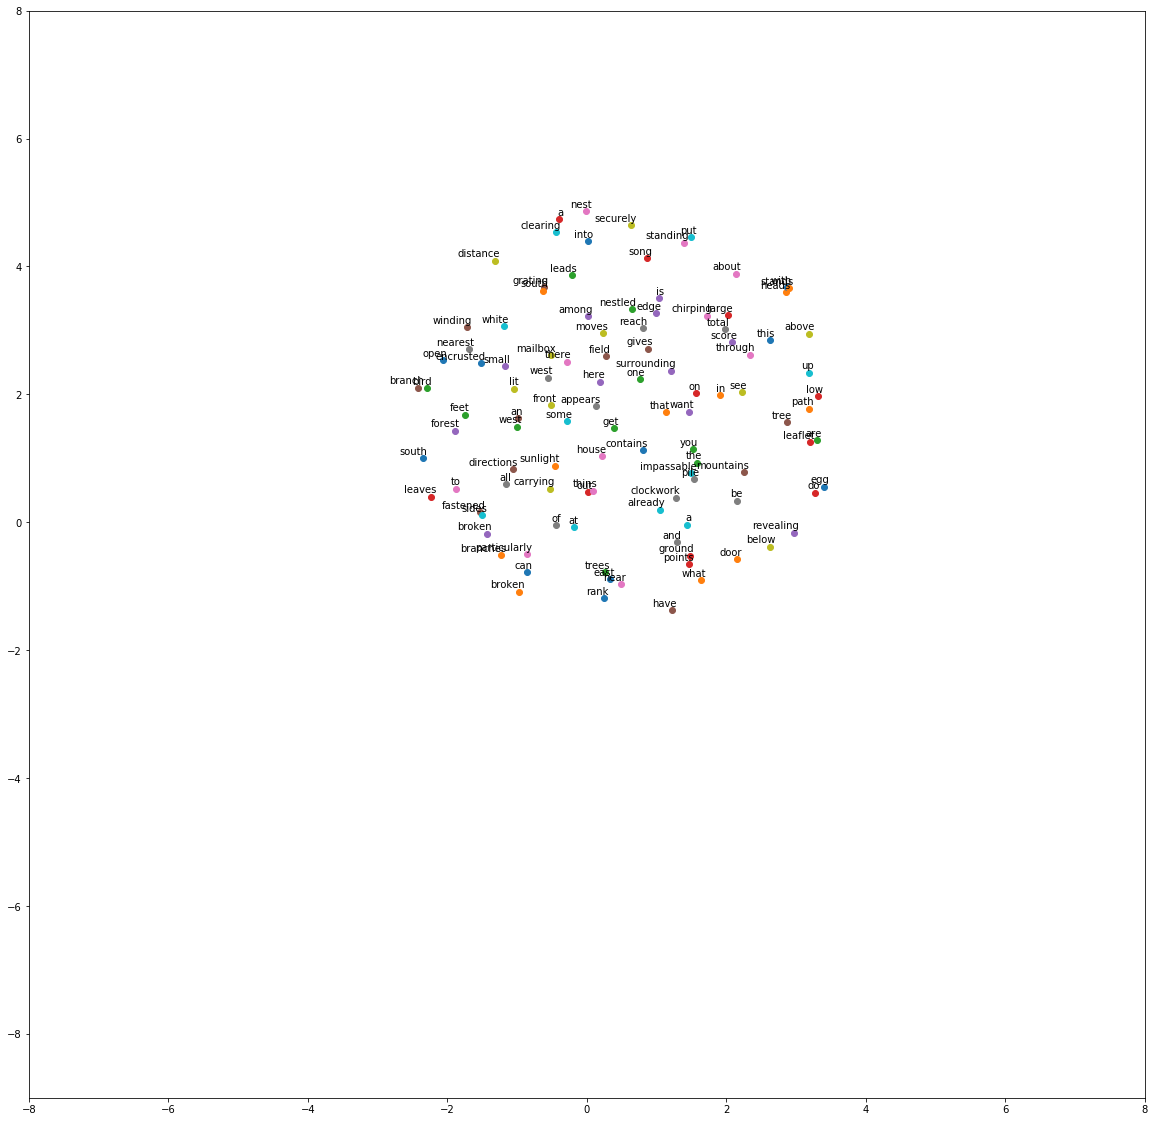

In [38]:
name4 = 'TSNE plot of word embeddings at the end of game.png'
tsne_plot(tokens_after,labels_after_clean,name4)